## Statistical Learning Project

In [1]:
#importing the libraries that we use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading data from csv file as dataframe
df = pd.read_csv("insurance.csv")

In [3]:
#Checking the first 5 records of loaded data 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Shape of each column

In [4]:
df.shape #shape of the data

(1338, 7)

In [5]:
df.info() #Get the total info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df["children"].value_counts() # Categorical variable

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Datatypes of each column

In [7]:
#Datatypes of each variable
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df_num = df.loc[:,["age","bmi","charges"]]
df_cat = df.loc[:,["sex","children","smoker","region"]]
df_num.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [9]:
df_cat.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


## Checking the missing values in all the Columns

In [10]:
#Checking the presences of missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Describe the five point summary

In [11]:
#5 point summary of numerical attributes
df_num.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


## Distribution of Columns bmi,age,charges

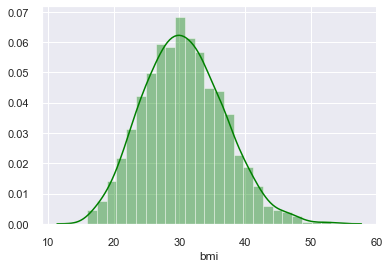

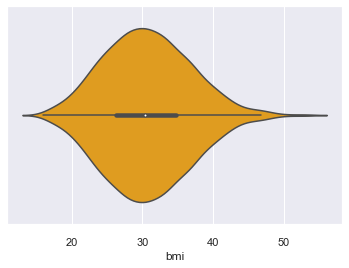

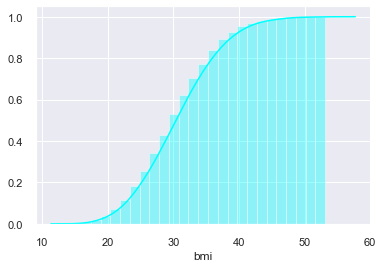

In [12]:
#Distribution of ‘bmi’ column.
sns.distplot(df["bmi"],color="Green");
plt.show()
sns.violinplot(df["bmi"],color="Orange");
plt.show()
sns.distplot(df["bmi"], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True),color="cyan")
plt.show()

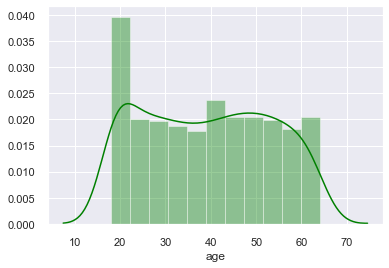

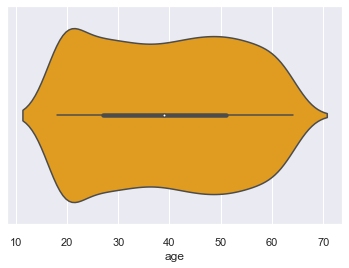

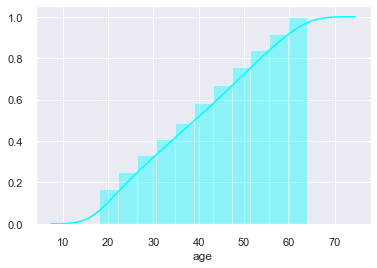

In [13]:
#Distribution of ‘age’ column.
sns.distplot(df["age"],color="Green");
plt.show()
sns.violinplot(df["age"],color="Orange");
plt.show()
sns.distplot(df["age"], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True),color="cyan")
plt.show()

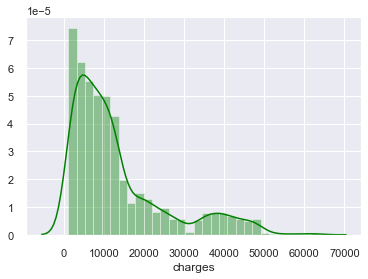

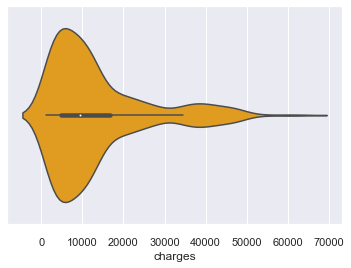

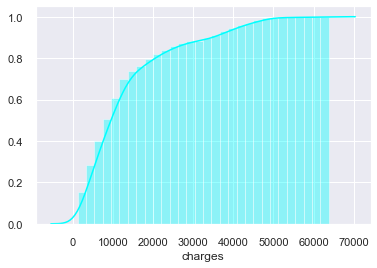

In [14]:
#Distribution of 'charges' column.
sns.distplot(df["charges"],color="Green");
plt.show()
sns.violinplot(df["charges"],color="Orange");
plt.show()
sns.distplot(df["charges"], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True),color="cyan")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Checking the Skewness

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

In [15]:
df_num.skew() #measures the skewness of every numerical attribute

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

## Checking the presence of outliers

### Boxplots

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently(outliers). 

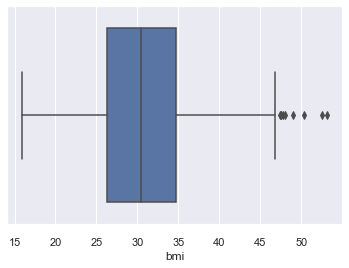

In [16]:
sns.boxplot(df["bmi"]);
plt.show()

***Above bmi*** plot shows the existence outliers

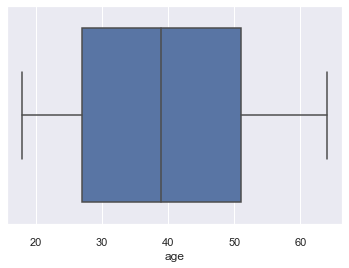

In [17]:
sns.boxplot(df["age"]);
plt.show()

***Above age*** plot shows no outlier

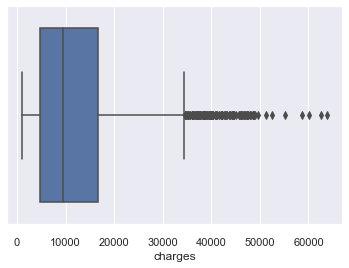

In [18]:
sns.boxplot(df["charges"]);
plt.show()

***Above changes*** plot shows Existence of outlier

# Distribution of categorical columns (include children)

In [19]:
df_cat.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

### Count plot of Sex column

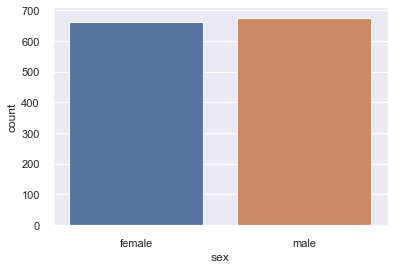

In [20]:
sns.countplot(df_cat["sex"]);

### Count plot of Children column

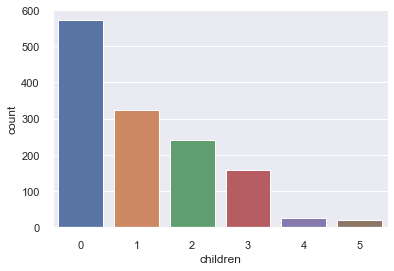

In [21]:
sns.countplot(df_cat["children"]);
plt.show()

### Count plot of Smoker column

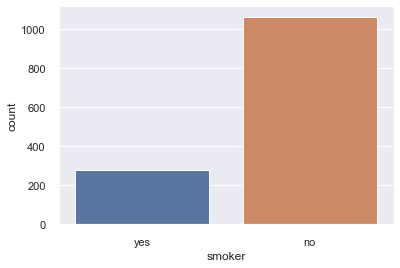

In [22]:
sns.countplot(df_cat["smoker"]);

### Count plot of region column

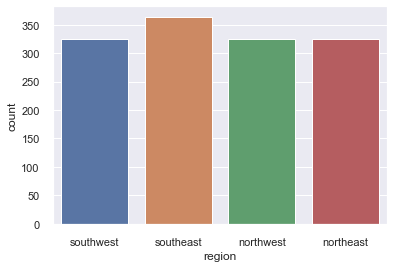

In [23]:
sns.countplot(df_cat["region"]);

## Pair plot of all the columns

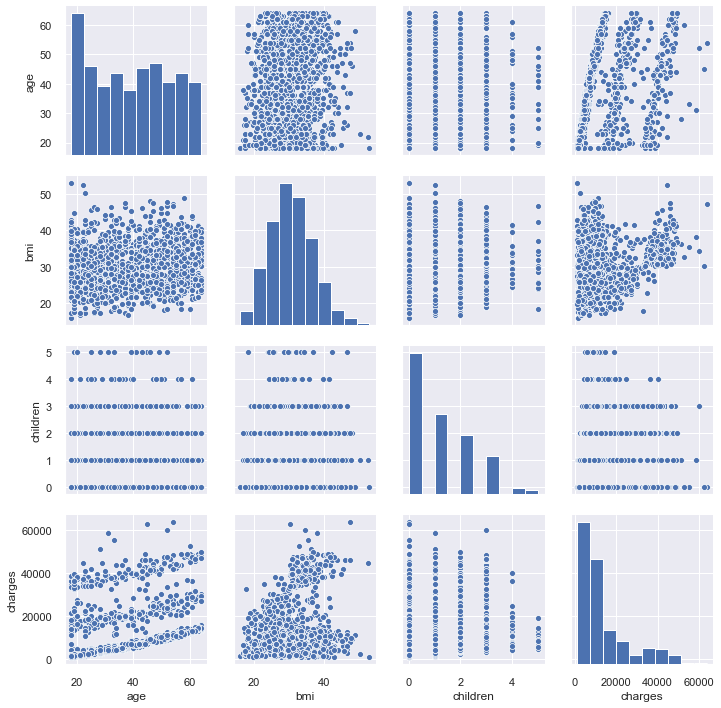

In [24]:
sns.pairplot(df);

## Profile report of the complete dataframe

In [25]:
pp.ProfileReport(df)

### Do charges of people who smoke differ significantly from the people who don't?


In [26]:
df_cat["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
ppl_smoke_chrge = df[df["smoker"]=="yes"]["charges"]

In [28]:
ppl_nosmoke_chrge = df[df["smoker"]=="no"]["charges"]

In [29]:
print(f"Mean of smoker charges: {np.mean(ppl_smoke_chrge)}")
print(f"Mean of non-smoker charges: {np.mean(ppl_nosmoke_chrge)}")

Mean of smoker charges: 32050.23183153285
Mean of non-smoker charges: 8434.268297856199


In [30]:
print(f"Std of smoker charges {np.std(ppl_smoke_chrge)}")
print(f"Std of non-smoker charges {np.std(ppl_nosmoke_chrge)}")

Std of smoker charges 11520.466706529429
Std of non-smoker charges 5990.964530287611


###  Null and alternative hypothesis


* $H_0$: $\mu{SMC}$ - $\mu{NSMC}$ =      0
* $H_A$: $\mu{SMC}$ - $\mu{NSMC}$ $\neq$  0

### Significance Level 

Here we select $\alpha$ = 0.05

**Since the sample size is more than 30 we need to carryout Z-test**

In [31]:
z_statistic,pval = ztest(ppl_smoke_chrge,x2=ppl_nosmoke_chrge,value=0, alternative='two-sided')

In [32]:
print('P Value ',pval)    

P Value  0.0


In [33]:
if pval <0.05:
  print("Since pval is very much less than significance level we tend to reject null hypothesis")
else:
  print("we Fail to reject null hypothesis")

Since pval is very much less than significance level we tend to reject null hypothesis


##### Conclusion

**Yes the charges of people who smoke differ significantly from the people who don't**

.

.

## Does bmi of males differ significantly from that of females?

In [34]:
 df_cat["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [35]:
bmi_male = df[df["sex"]=="male"]["bmi"]
bmi_female = df[df["sex"]=="female"]["bmi"]

In [36]:
print(f"Mean of bmi male: {np.mean(bmi_male)}")
print(f"Mean of bmi female: {np.mean(bmi_female)}")
print(f"Std of bmi male: {np.std(bmi_male)}")
print(f"Std of bmi female: {np.std(bmi_female)}")

Mean of bmi male: 30.943128698224832
Mean of bmi female: 30.377749244713023
Std of bmi male: 6.135891193330876
Std of bmi female: 6.041454877245924


###  Null and alternative hypothesis


* $H_0$: $\mu{BmiMale}$ - $\mu{BmifeMale}$ =      0
* $H_A$: $\mu{BmiMale}$ - $\mu{BmifeMale}$ $\neq$  0

### Significance Level 
Here we select $\alpha$ = 0.05

In [37]:
z_statistic,pval = ztest(bmi_male,x2=bmi_female,value=0, alternative='two-sided')

In [38]:
print('P Value ',pval)

P Value  0.08974343679943912


In [39]:
if pval <0.05:
  print("Since pval is very much less than significance level we tend to reject null hypothesis")
else:
  print("we Fail to reject null hypothesis")

we Fail to reject null hypothesis


##### Conclusion

**No the bmi of males donot differ significantly from that of females**

.

.

### Is the proportion of smokers significantly different in different genders?

#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

### Significance Level
Here we select $\alpha$= 0.05

In [40]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data

In [41]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


The proportions are different but are they statistically significant?

In [42]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


#### Conclusion

***Yes the Proportion of smokers significantly different in different genders***

.

.

### Is the distribution of bmi across women with no children, one child and two children, the same?

In [43]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [44]:
bmi_w_noc = df[(df['sex']=='female') & (df['children']==0)].bmi
bmi_w_1c = df[(df['sex']=='female') & (df['children']==1)].bmi
bmi_w_2c = df[(df['sex']=='female') & (df['children']==2)].bmi

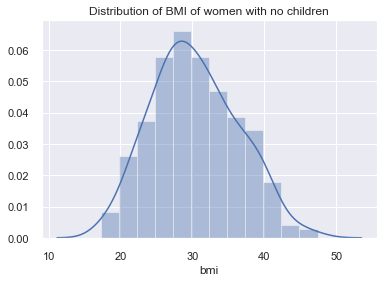

In [45]:
sns.distplot(bmi_w_noc);
plt.title("Distribution of BMI of women with no children")
plt.show()

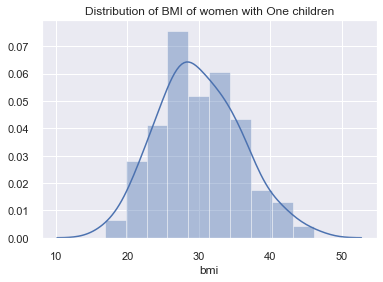

In [46]:
sns.distplot(bmi_w_1c);
plt.title("Distribution of BMI of women with One children")
plt.show()

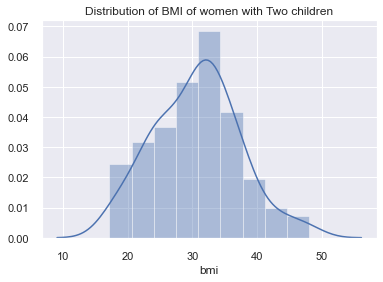

In [47]:
sns.distplot(bmi_w_2c);
plt.title("Distribution of BMI of women with Two children")
plt.show()

In [48]:
bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'women': 'NoChild', 'bmi':bmi_w_noc})
df2            = pd.DataFrame({'women': 'OneChild', 'bmi':bmi_w_1c})
df3            = pd.DataFrame({'women': 'TwoChild', 'bmi':bmi_w_2c})

bmi_df = bmi_df.append(df1) 
bmi_df = bmi_df.append(df2) 
bmi_df = bmi_df.append(df3)

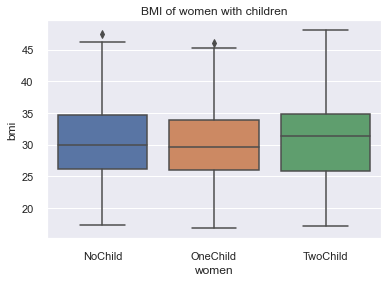

In [49]:
sns.boxplot(x = "women", y = "bmi", data = bmi_df)
plt.title('BMI of women with children')
plt.show()

#### The boxplot shows mostly same mean but mean slightly differs at women with two children. Let check it statistically

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 


Here $\mu1$, $\mu2$ and $\mu3$ are the mean of bmi of women with no children, one children and two children respectively.

#### Significance level 
$\alpha\$ = 0.05 

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### calculate p value using Anova

In [50]:
mod = ols('bmi ~ women', data = bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
women        24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


##### P value 0.7158  is greater than 0.05. So we are unable to reject null hypothesis .
***Hence the mean and distribution of bmi across women with no child,1child and 2 child are same***

In [51]:
print(pairwise_tukeyhsd(bmi_df['bmi'], bmi_df['women']))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 NoChild OneChild  -0.3089 0.8494 -1.7186 1.1008  False
 NoChild TwoChild   0.2883 0.8942 -1.2636 1.8402  False
OneChild TwoChild   0.5971 0.6797 -1.1323 2.3265  False
-------------------------------------------------------


***We are able to see the reject is false in every case so the distribution of bmi across women with 0,1,2children are same***

### END